# DADS5001 : Earthquake Analysis



# *-import Data & Check*



In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt




#Upload Excel : Earthqurke_D1
# from google.colab import files
# uploaded = files.upload()

df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

df.head()





ModuleNotFoundError: No module named 'cartopy'

In [ ]:
#check df

df.info()
df.describe
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               14986 non-null  int64  
 1   REF. ID           14986 non-null  object 
 2   DATE-TIME UTC     14986 non-null  object 
 3   DATE THAI         14986 non-null  object 
 4   YEAR              14986 non-null  int64  
 5   TIME THAI         14986 non-null  object 
 6   LAT.              14986 non-null  float64
 7   LONG.             14986 non-null  float64
 8   MAG.              14986 non-null  float64
 9   MAG_RANGE         14986 non-null  object 
 10  MAG_RANGE_DES     14986 non-null  object 
 11  DEPTH.            14986 non-null  float64
 12  PHASE.            14986 non-null  int64  
 13  REGION_NANE_THAI  14986 non-null  object 
 14  SUB_DISTRICT      1215 non-null   object 
 15  DISTRICT          3664 non-null   object 
 16  PROVINCE          5356 non-null   object

,0
No.,0
REF. ID,0
DATE-TIME UTC,0
DATE THAI,0
YEAR,0
TIME THAI,0
LAT.,0
LONG.,0
MAG.,0
MAG_RANGE,0


# Analysis

# *-Over All*

<Axes: title={'center': 'Number of Earthquakes per Year'}, xlabel='YEAR'>

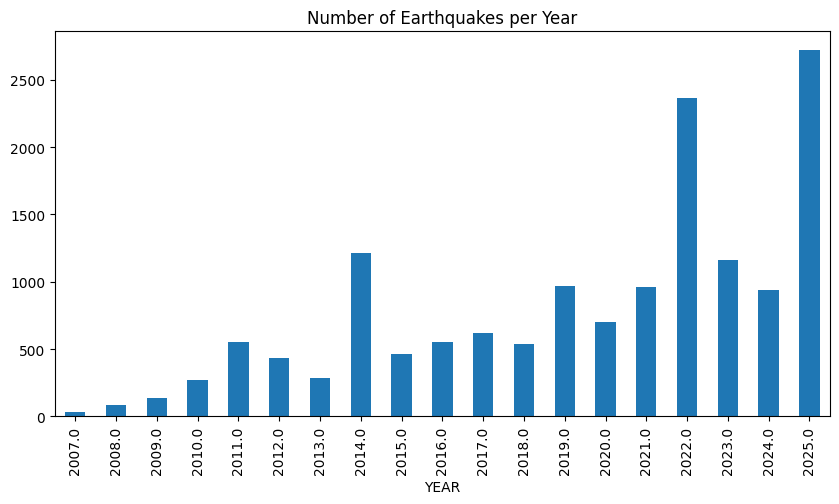

In [ ]:
#Number of Earthquakes per Year

df['YEAR'].value_counts().sort_index().plot(kind='bar', title='Number of Earthquakes per Year', figsize=(10,5))

"""เหตุการณ์แผ่นดินไหวที่เกิด ต่อปี"""

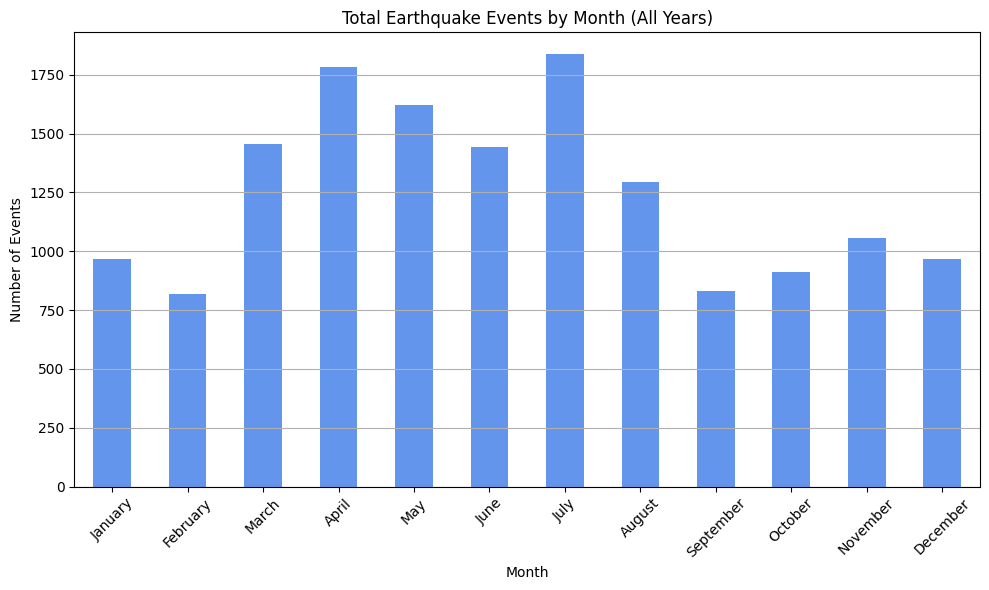

In [ ]:
# แปลงวันที่เป็น datetime แล้วดึงชื่อเดือนภาษาอังกฤษ
df['MONTH_NAME'] = pd.to_datetime(df['DATE THAI']).dt.strftime('%B')

# นับจำนวนเหตุการณ์ในแต่ละเดือน (รวมทุกปี)
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['MONTH_NAME'].value_counts().reindex(month_order).plot(kind='bar', color='cornflowerblue', figsize=(10,6))

plt.title('Total Earthquake Events by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

"""แบบรายเดือน"""

# *-By Region*

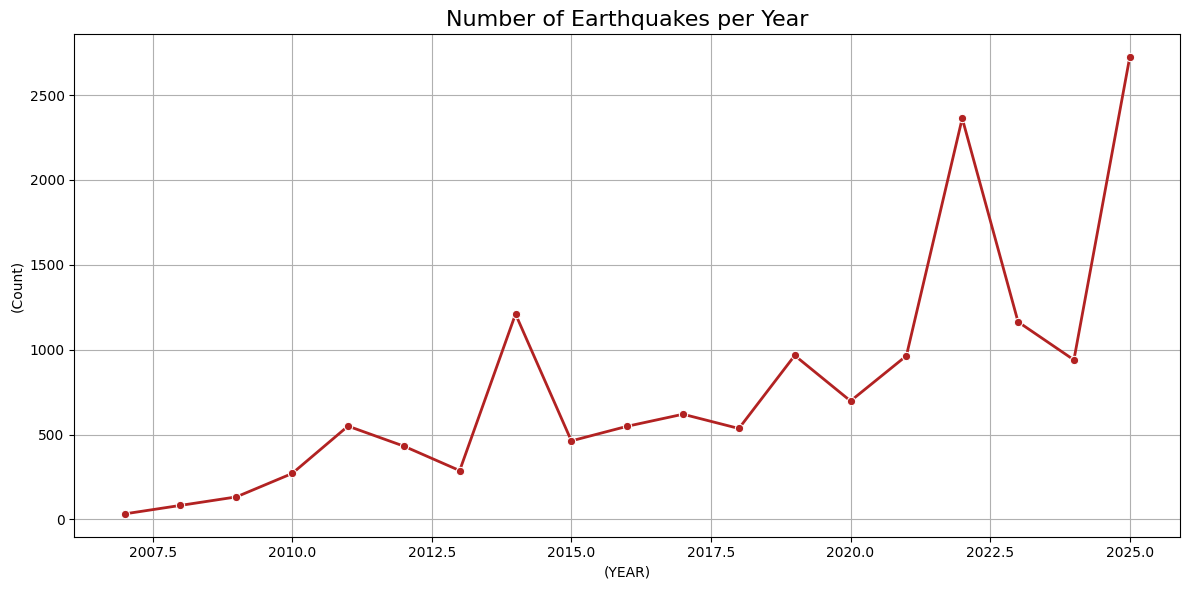

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูลจากไฟล์ Excel
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

# เตรียมข้อมูล: กรองเฉพาะแถวที่มีปีและ magnitude
df = df.dropna(subset=['YEAR', 'MAG.'])
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MAG.'] = pd.to_numeric(df['MAG.'], errors='coerce')
df = df.dropna(subset=['YEAR', 'MAG.'])

# สร้างตารางสรุปจำนวนเหตุการณ์ต่อปี
yearly_counts = df.groupby('YEAR').size().reset_index(name='Count')

# พล็อตกราฟแนวโน้ม
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts, x='YEAR', y='Count', marker='o', linewidth=2, color='firebrick')
plt.title('Number of Earthquakes per Year', fontsize=16)
plt.xlabel('(YEAR)')
plt.ylabel('(Count)')
plt.grid(True)
plt.tight_layout()
plt.show()


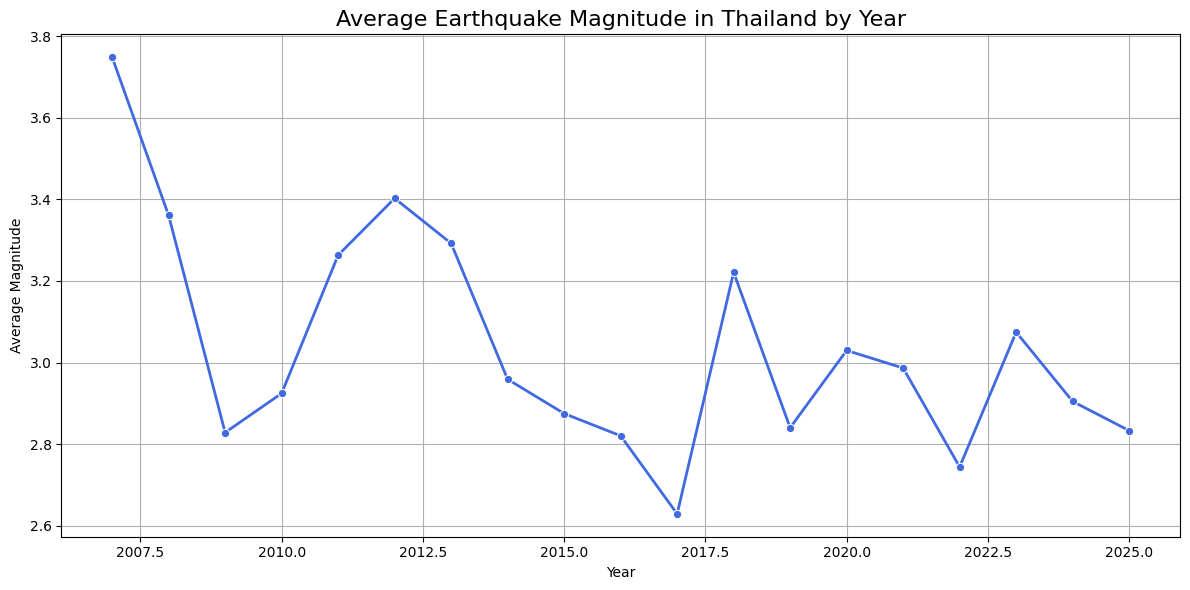

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

# Clean and prepare
df = df.dropna(subset=['YEAR', 'MAG.'])
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MAG.'] = pd.to_numeric(df['MAG.'], errors='coerce')
df = df.dropna(subset=['YEAR', 'MAG.'])

# Group by year and calculate average magnitude
avg_mag_by_year = df.groupby('YEAR')['MAG.'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_mag_by_year, x='YEAR', y='MAG.', marker='o', linewidth=2, color='royalblue')
plt.title('Average Earthquake Magnitude in Thailand by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()


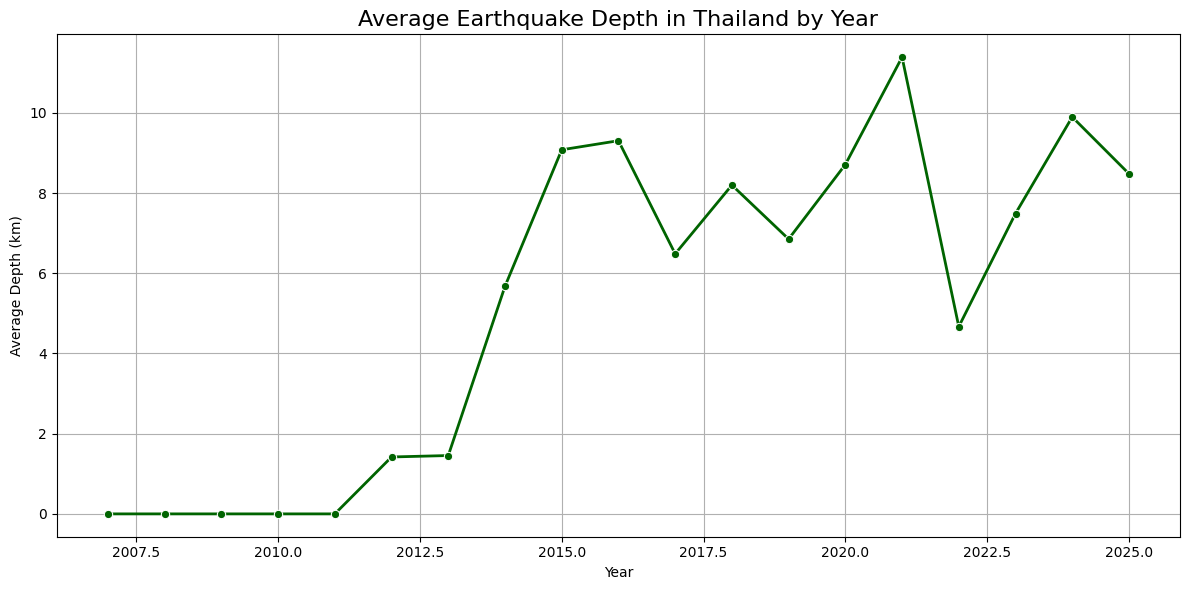

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load earthquake data (English version)
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

# Clean and prepare data
df = df.dropna(subset=['YEAR', 'DEPTH.'])
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['DEPTH.'] = pd.to_numeric(df['DEPTH.'], errors='coerce')
df = df.dropna(subset=['YEAR', 'DEPTH.'])

# Group by year and calculate average depth
avg_depth_by_year = df.groupby('YEAR')['DEPTH.'].mean().reset_index()

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_depth_by_year, x='YEAR', y='DEPTH.', marker='o', linewidth=2, color='darkgreen')
plt.title('Average Earthquake Depth in Thailand by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Depth (km)')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'AVG_Magnitude_Region'}, ylabel='THAI_REGION'>

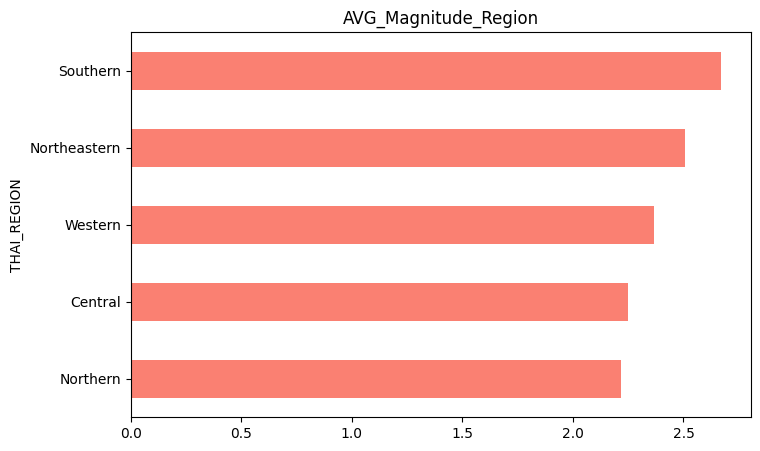

In [ ]:
# AVG_Magnitude Of Thai Region

df.groupby('THAI_REGION')['MAG.'].mean().sort_values().plot(kind='barh', title='AVG_Magnitude_Region', figsize=(8,5))


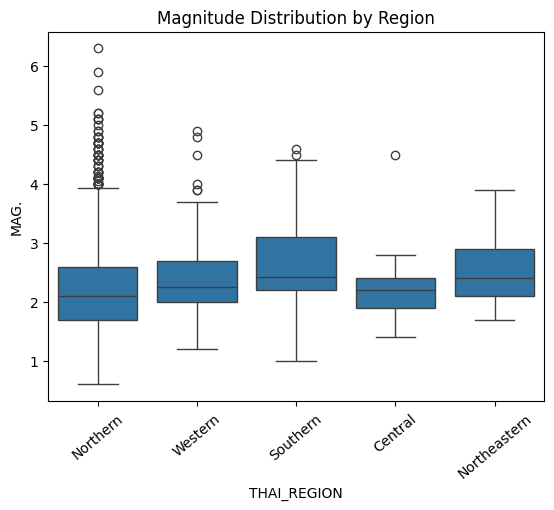

In [ ]:
# Boxplot AVG_Magnitude Of Thai Region

import seaborn as sns

sns.boxplot(data=df, x='THAI_REGION', y='MAG.')
plt.title('Magnitude Distribution by Region')
plt.xticks(rotation=40)
plt.show()


"""
Northern	มี outliers เยอะมากด้านบน → บ่งชี้ว่ามีเหตุการณ์รุนแรงหลายครั้ง

Southern	Median สูง และ IQR กว้าง → ความรุนแรงเฉลี่ยค่อนข้างสูงและแปรปรวน

Central	IQR แคบและ outlier น้อย → ขนาดแผ่นดินไหวค่อนข้างคงที่

Western & Northeastern	อยู่ระหว่างกลาง → มีความแปรปรวนแต่ไม่สุดโต่ง"""

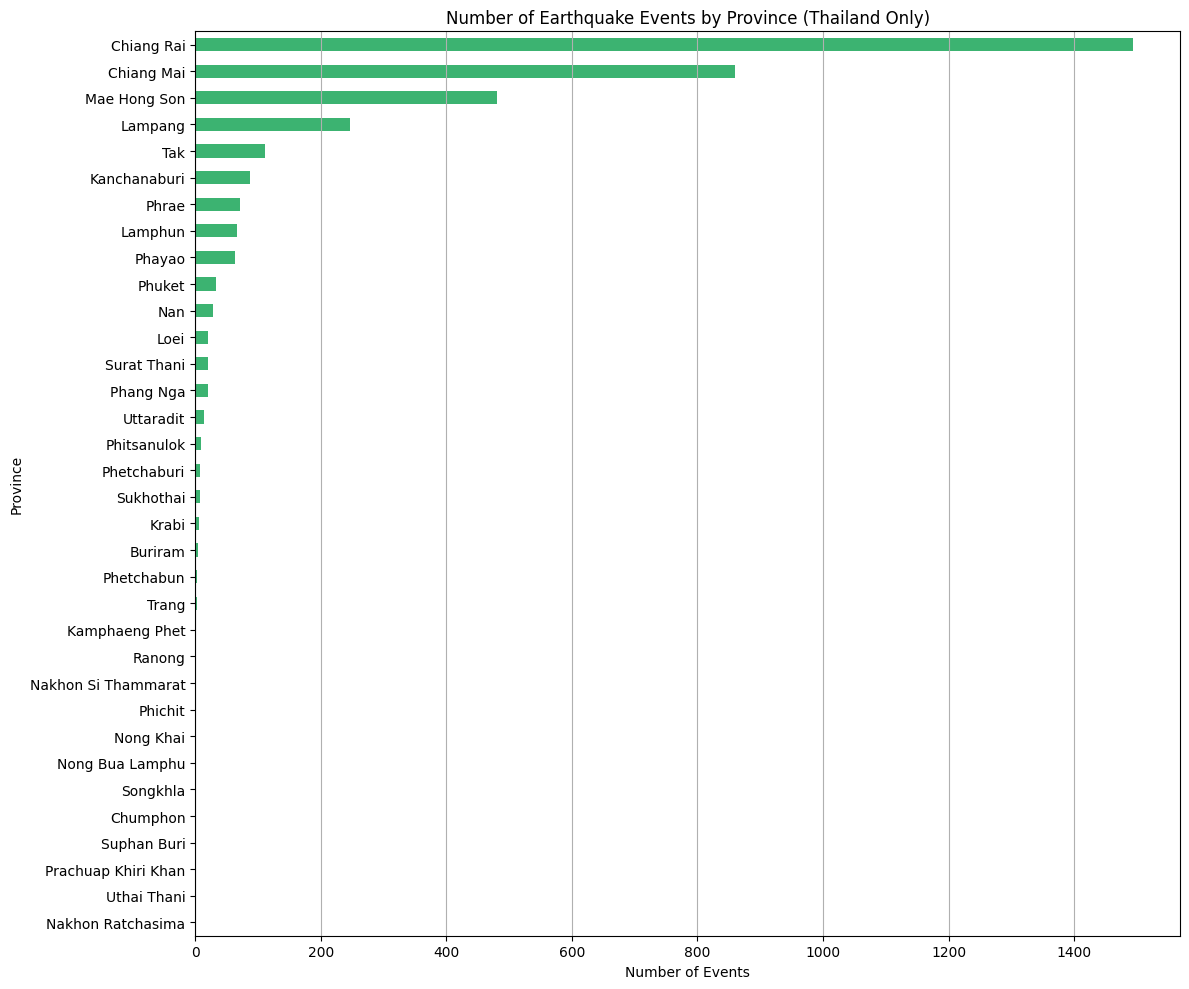

In [ ]:
df[df['COUNTRY'] == 'Thailand']['PROVINCE'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    figsize=(12,10),
    color='mediumseagreen'
)

plt.title('Number of Earthquake Events by Province (Thailand Only)')
plt.xlabel('Number of Events')
plt.ylabel('Province')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving gadm41_THA_3.shp to gadm41_THA_3.shp
Saving gadm41_THA_3.shx to gadm41_THA_3.shx
Saving gadm41_THA_0.cpg to gadm41_THA_0.cpg
Saving gadm41_THA_0.dbf to gadm41_THA_0.dbf
Saving gadm41_THA_0.prj to gadm41_THA_0.prj
Saving gadm41_THA_0.shp to gadm41_THA_0.shp
Saving gadm41_THA_0.shx to gadm41_THA_0.shx
Saving gadm41_THA_1.cpg to gadm41_THA_1.cpg
Saving gadm41_THA_1.dbf to gadm41_THA_1.dbf
Saving gadm41_THA_1.prj to gadm41_THA_1.prj
Saving gadm41_THA_1.shp to gadm41_THA_1 (1).shp
Saving gadm41_THA_1.shx to gadm41_THA_1.shx
Saving gadm41_THA_2.cpg to gadm41_THA_2.cpg
Saving gadm41_THA_2.dbf to gadm41_THA_2.dbf
Saving gadm41_THA_2.prj to gadm41_THA_2.prj
Saving gadm41_THA_2.shp to gadm41_THA_2.shp
Saving gadm41_THA_2.shx to gadm41_THA_2.shx
Saving gadm41_THA_3.cpg to gadm41_THA_3.cpg
Saving gadm41_THA_3.dbf to gadm41_THA_3.dbf
Saving gadm41_THA_3.prj to gadm41_THA_3.prj


In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 66.0 MB/s eta 0:00:00


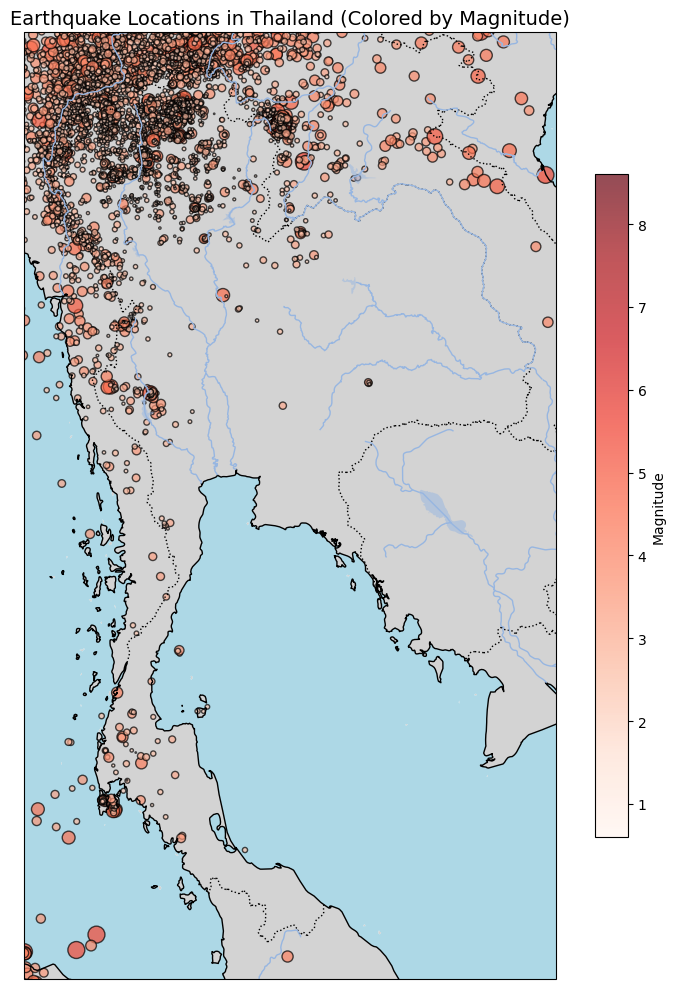

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# โหลดข้อมูลจากไฟล์ Excel
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

# เตรียมข้อมูล: กรองเฉพาะแถวที่มีพิกัดและ magnitude
df = df.dropna(subset=["LAT.", "LONG.", "MAG."])
df["MAG."] = pd.to_numeric(df["MAG."], errors="coerce")
df = df[df["MAG."] > 0]

# สร้างแผนที่ประเทศไทย
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# เพิ่มองค์ประกอบแผนที่
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# ตั้งขอบเขตประเทศไทยโดยประมาณ
ax.set_extent([97, 106, 5, 21], crs=ccrs.PlateCarree())

# พล็อตจุดแผ่นดินไหว
sc = ax.scatter(
    df["LONG."], df["LAT."],
    c=df["MAG."],
    s=df["MAG."]**3,  # ขนาดจุดตาม magnitude
    cmap="Reds",
    alpha=0.7,
    edgecolor="k",
    transform=ccrs.PlateCarree()
)

# เพิ่ม colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.7)
cbar.set_label("Magnitude")

# เพิ่มชื่อกราฟ
plt.title("Earthquake Locations in Thailand (Colored by Magnitude)", fontsize=14)
plt.tight_layout()
plt.show()


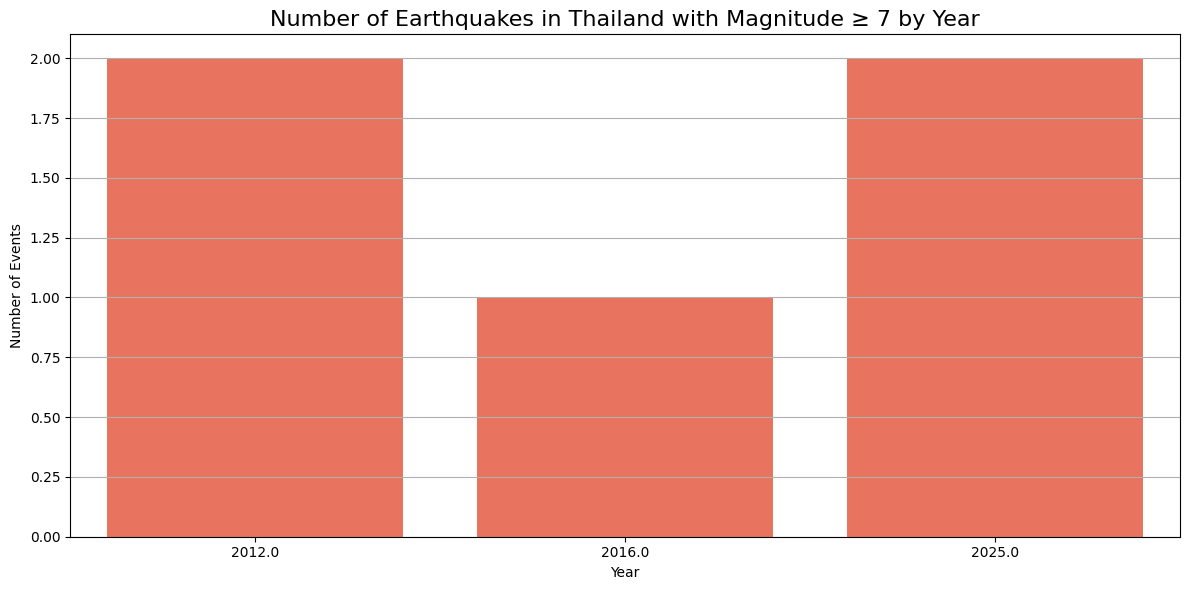

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('DATA_Earthquake_Draft1_eng.xlsx')

# Clean and filter
df = df.dropna(subset=['YEAR', 'MAG.'])
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['MAG.'] = pd.to_numeric(df['MAG.'], errors='coerce')
df = df.dropna(subset=['YEAR', 'MAG.'])
df_mag5 = df[df['MAG.'] >= 7]

# Count events per year
mag5_counts = df_mag5.groupby('YEAR').size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=mag5_counts, x='YEAR', y='Count', color='tomato')
plt.title('Number of Earthquakes in Thailand with Magnitude ≥ 7 by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
